In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1= pd.read_csv('Google_Stock_Price_train.csv')
df2= pd.read_csv('Google_Stock_Price_test.csv')

In [3]:
df1.shape

(1258, 6)

In [4]:
df2.shape

(20, 6)

In [5]:
df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [44]:
df1_train= df1[['High']]
df2_test= df2[['High']]

In [47]:
df1_train.head()

,High
0,332.83
1,333.87
2,330.75
3,328.77
4,322.29


In [48]:
min_max=MinMaxScaler()
train= min_max.fit_transform(df1_train)
train

array([[0.09640129],
       [0.09834351],
       [0.09251685],
       ...,
       [0.95807422],
       [0.94257381],
       [0.93669113]])

In [49]:
len(train)

1258

In [51]:
#### window size =60
x_train=[]
y_train=[]
for i in range(60,len(train)):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])
x_train= np.array(x_train)
y_train= np.array(y_train)
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [56]:
x_train.shape[0],x_train.shape[1]

(1198, 60)

In [55]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

#### Model Building--RNN

In [61]:
rnn= tf.keras.models.Sequential()
rnn.add(tf.keras.layers.SimpleRNN(units=50,return_sequences=True,input_shape=[60,1])) ### input layer , first hidden layer
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.SimpleRNN(units=50,return_sequences=True)) ## second hidden layer
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.SimpleRNN(units=50,return_sequences=True)) ###  third hidden layer
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.SimpleRNN(units=50)) ### fourth hidden layer
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.Dense(1)) ### output layer

In [62]:
#### Model compile
rnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

In [63]:
1198/30

39.93333333333333

In [64]:
#### Model Training 
rnn.fit(x_train,y_train,epochs=100,batch_size=30)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.3481
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.2095 
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.1600 
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1099 
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0902 
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0714 
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0652 
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0508 
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0409 
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0387 
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0346
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0314 
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0255 
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0236 
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57

In [66]:
#### Testing data preparation
df2_test.head()

,High
0,789.63
1,791.34
2,794.48
3,807.90
4,809.97


In [70]:
df1_train.shape

(1258, 1)

In [71]:
df2_test.shape

(20, 1)

In [89]:
df_total= pd.concat([df1_train,df2_test],axis=0)

In [90]:
df_total.shape

(1278, 1)

In [91]:
inputs= df_total[len(df_total)-len(df2_test)-60:]
inputs.shape

(80, 1)

In [92]:
inputs.head()

,High
1198,780.48
1199,779.66
1200,789.38
1201,792.28
1202,788.13


In [93]:
inputs= min_max.transform(inputs)
inputs.shape

(80, 1)

In [94]:
x_test=[]
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test= np.array(x_test)
x_test.shape

(20, 60)

In [95]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [100]:
pred=rnn.predict(x_test)
pred1= min_max.inverse_transform(pred)
pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[787.1258 ],
       [786.9411 ],
       [787.6954 ],
       [789.3174 ],
       [791.4169 ],
       [793.626  ],
       [795.3202 ],
       [796.39484],
       [796.2166 ],
       [795.6659 ],
       [794.99945],
       [793.8065 ],
       [793.5662 ],
       [793.74133],
       [795.69604],
       [798.25616],
       [801.6913 ],
       [804.49316],
       [805.97107],
       [804.26215]], dtype=float32)

In [97]:
df2_test

,High
0,789.63
1,791.34
2,794.48
3,807.90
4,809.97
5,809.13
6,808.15
7,807.39
8,811.22
9,807.14


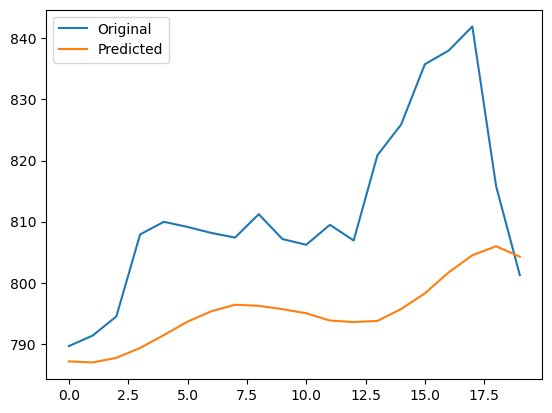

In [101]:
plt.plot(df2_test,label='Original')
plt.plot(pred1,label='Predicted')
plt.legend()

#### LSTM

In [104]:
lstm= tf.keras.models.Sequential()
lstm.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=[60,1])) ### input layer , first hidden layer
lstm.add(tf.keras.layers.Dropout(0.2))
lstm.add(tf.keras.layers.LSTM(units=50,return_sequences=True)) ## second hidden layer
lstm.add(tf.keras.layers.Dropout(0.2))
lstm.add(tf.keras.layers.LSTM(units=50,return_sequences=True)) ###  third hidden layer
lstm.add(tf.keras.layers.Dropout(0.2))
lstm.add(tf.keras.layers.LSTM(units=50)) ### fourth hidden layer
lstm.add(tf.keras.layers.Dropout(0.2))
lstm.add(tf.keras.layers.Dense(1)) ### output layer

In [105]:
#### Model compile
lstm.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

In [106]:
#### Model Training
lstm.fit(x_train,y_train,epochs=100,batch_size=30)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - loss: 0.0336
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0068
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0062
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0054
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0052
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0050
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0053 
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0042
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0041
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0042
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0049 
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0045 
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0038
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0039
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s

In [107]:
pred=lstm.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [108]:
pred1= min_max.inverse_transform(pred)

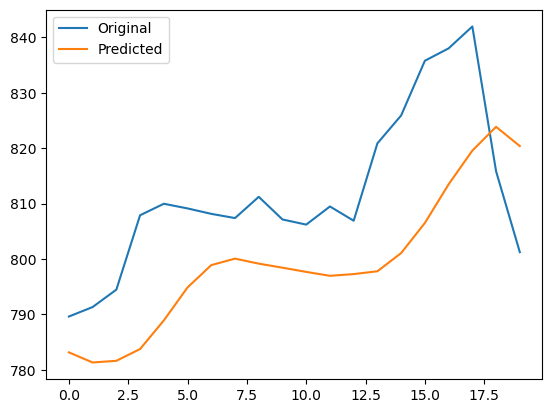

In [109]:
plt.plot(df2_test,label=['Original'])
plt.plot(pred1,label=['Predicted'])
plt.legend()

#### GRU

In [110]:
gru= tf.keras.models.Sequential()
gru.add(tf.keras.layers.GRU(units=50,return_sequences=True,input_shape=[60,1])) ### input layer , first hidden layer
gru.add(tf.keras.layers.Dropout(0.2))
gru.add(tf.keras.layers.GRU(units=50,return_sequences=True)) ## second hidden layer
gru.add(tf.keras.layers.Dropout(0.2))
gru.add(tf.keras.layers.GRU(units=50,return_sequences=True)) ###  third hidden layer
gru.add(tf.keras.layers.Dropout(0.2))
gru.add(tf.keras.layers.GRU(units=50)) ### fourth hidden layer
gru.add(tf.keras.layers.Dropout(0.2))
gru.add(tf.keras.layers.Dense(1)) ### output layer

In [111]:
#### Model compile
gru.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

In [112]:
#### Model training
gru.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - loss: 0.0429
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0056
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0051
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0049
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0042
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0037
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0041
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0035
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - loss: 0.0034 
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - loss: 0.0037
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0034 
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0034
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.0036
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0030
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step -

In [113]:
pred= gru.predict(x_test)
pred1= min_max.inverse_transform(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


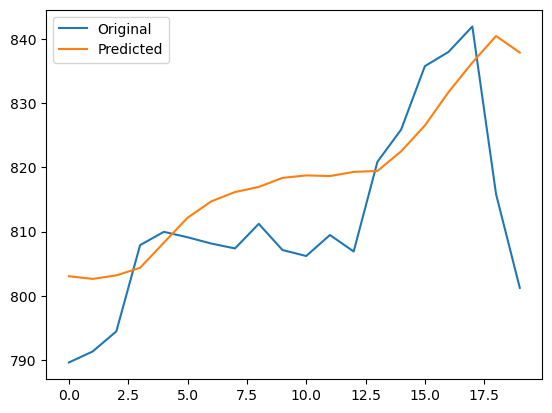

In [114]:
plt.plot(df2_test,label=['Original'])
plt.plot(pred1,label=['Predicted'])
plt.legend()